**Pandas _ 详解数据的合并和拼接.pdf**

- merge方法主要是**基于两个dataframe的共同列**进行合并，
- join方法主要是**基于两个dataframe的索引**进行合并，
- concat方法是**基于series或dataframe进行行拼接或列拼接**。


### Merge Method

In [4]:
import numpy as np
import pandas as pd 

df1 = pd.DataFrame({'alpha':['A','B','B','C','D','E'],'feature1':[1,1,2,3,3,1], 'feature2':['low','medium','medium','high','low','high']})
df2 = pd.DataFrame({'alpha':['A','A','B','F'],'pazham':['apple','orange','pine','pear'],'kilo':['high','low','high','medium'],'price':np.array([5,6,5,7])})


In [5]:
df1

,alpha,feature1,feature2
0,A,1,low
1,B,1,medium
2,B,2,medium
3,C,3,high
4,D,3,low
5,E,1,high


In [6]:
df2

,alpha,pazham,kilo,price
0,A,apple,high,5
1,A,orange,low,6
2,B,pine,high,5
3,F,pear,medium,7


#### 内连接 how = 'inner', **取交集**

In [7]:
pd.merge(df1, df2, how = 'inner', on = 'alpha')

,alpha,feature1,feature2,pazham,kilo,price
0,A,1,low,apple,high,5
1,A,1,low,orange,low,6
2,B,1,medium,pine,high,5
3,B,2,medium,pine,high,5


**内连接的含义**

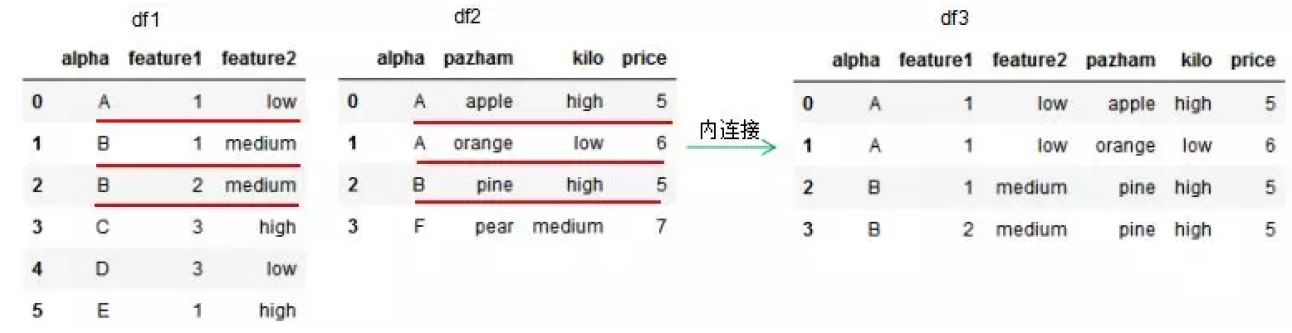

#### 外连接， how = 'outer', **取并集**

In [8]:
pd.merge(df1, df2, how = 'outer', on='alpha')

,alpha,feature1,feature2,pazham,kilo,price
0,A,1.0,low,apple,high,5.0
1,A,1.0,low,orange,low,6.0
2,B,1.0,medium,pine,high,5.0
3,B,2.0,medium,pine,high,5.0
4,C,3.0,high,NaN,NaN,NaN
5,D,3.0,low,NaN,NaN,NaN
6,E,1.0,high,NaN,NaN,NaN
7,F,NaN,NaN,pear,medium,7.0


**外连接的含义**

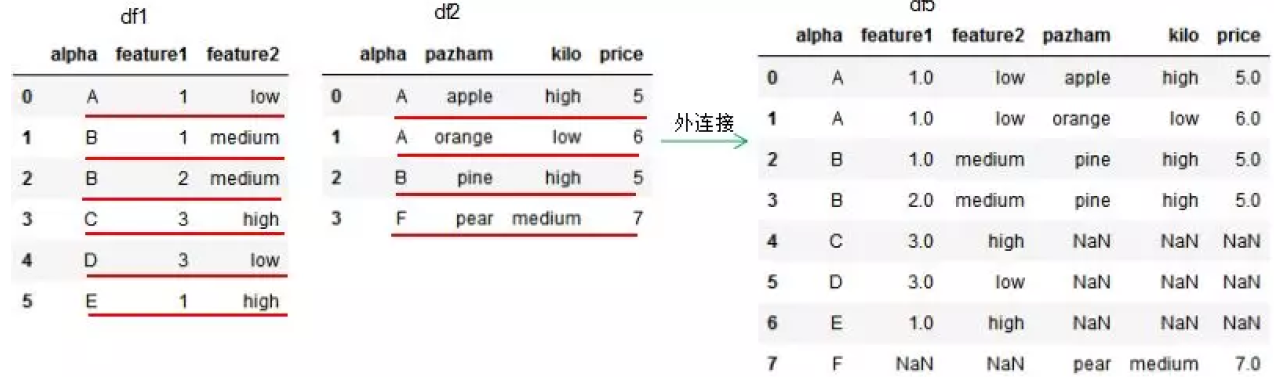

**若两个dataframe间除了on设置的连接外并无相同列，则该列的值置为NaN**

#### 左连接，how = 'left' 基于左边位置dataframe的列进行连接，参数on设置连接的共有列名

In [9]:
pd.merge(df1, df2, how='left', on= 'alpha')

,alpha,feature1,feature2,pazham,kilo,price
0,A,1,low,apple,high,5.0
1,A,1,low,orange,low,6.0
2,B,1,medium,pine,high,5.0
3,B,2,medium,pine,high,5.0
4,C,3,high,NaN,NaN,NaN
5,D,3,low,NaN,NaN,NaN
6,E,1,high,NaN,NaN,NaN


In [10]:
pd.merge(df2, df1, how='left', on='alpha')

,alpha,pazham,kilo,price,feature1,feature2
0,A,apple,high,5,1.0,low
1,A,orange,low,6,1.0,low
2,B,pine,high,5,1.0,medium
3,B,pine,high,5,2.0,medium
4,F,pear,medium,7,NaN,NaN


**左连接的含义**

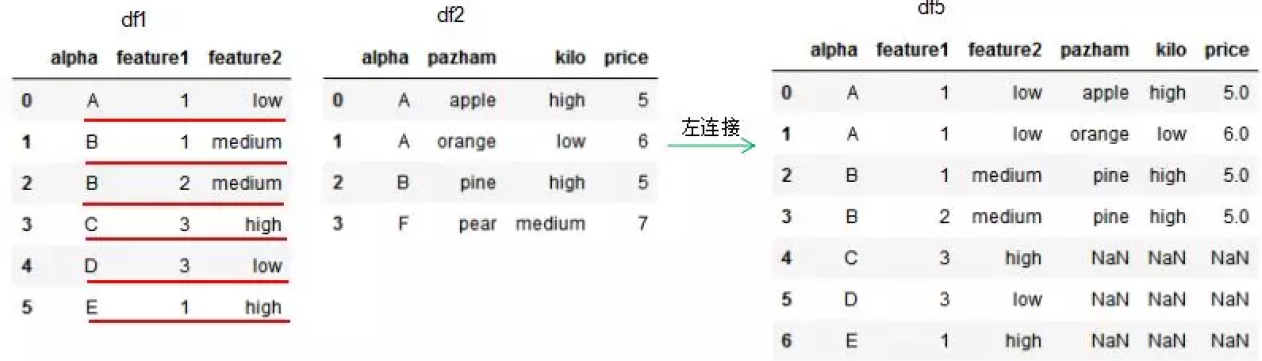

**若两个dataframe间除了on设置的连接外并无相同列，则该列的值置为NaN**

#### 右连接， how = 'right' 基于右边位置dataframe的列进行连接，参数on设置连接的共有列名¶

In [11]:
pd.merge(df1, df2, how='right', on='alpha')

,alpha,feature1,feature2,pazham,kilo,price
0,A,1.0,low,apple,high,5
1,A,1.0,low,orange,low,6
2,B,1.0,medium,pine,high,5
3,B,2.0,medium,pine,high,5
4,F,NaN,NaN,pear,medium,7


**右连接的含义**

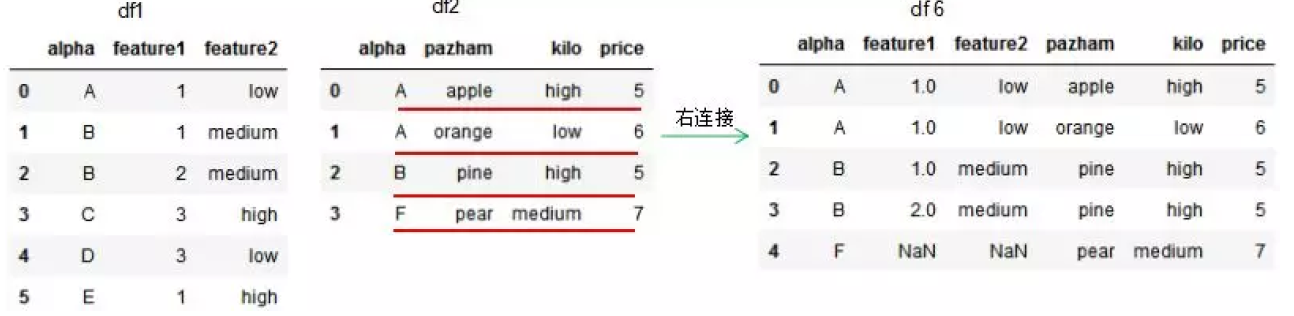

若两个dataframe间除了on设置的连接外并无相同列，则该列的值置为NaN

#### 基于多列的内连接, 取交集

In [20]:
df1 = pd.DataFrame({'alpha':['A','B','B','C','D','E','F'],'beta':['a','a','b','c','c','e','e'],'feature1':[1,1,2,3,3,1,2],'feature2':['low','medium','medium','high','low','high', 'low']})
df2 = pd.DataFrame({'alpha':['A','A','B','F'],'beta':['d','d','b','f'],'pazham':['apple','orange', 'pine', 'pare'],'kilo':['high','low','high','medium'],'price':np.array([5,6,5,7])})


In [21]:
df1


,alpha,beta,feature1,feature2
0,A,a,1,low
1,B,a,1,medium
2,B,b,2,medium
3,C,c,3,high
4,D,c,3,low
5,E,e,1,high
6,F,e,2,low


In [22]:
df2


,alpha,beta,pazham,kilo,price
0,A,d,apple,high,5
1,A,d,orange,low,6
2,B,b,pine,high,5
3,F,f,pare,medium,7


In [23]:
pd.merge(df1, df2, how='inner', on=['alpha', 'beta'])

,alpha,beta,feature1,feature2,pazham,kilo,price
0,B,b,2,medium,pine,high,5


**多列内连接的含义**

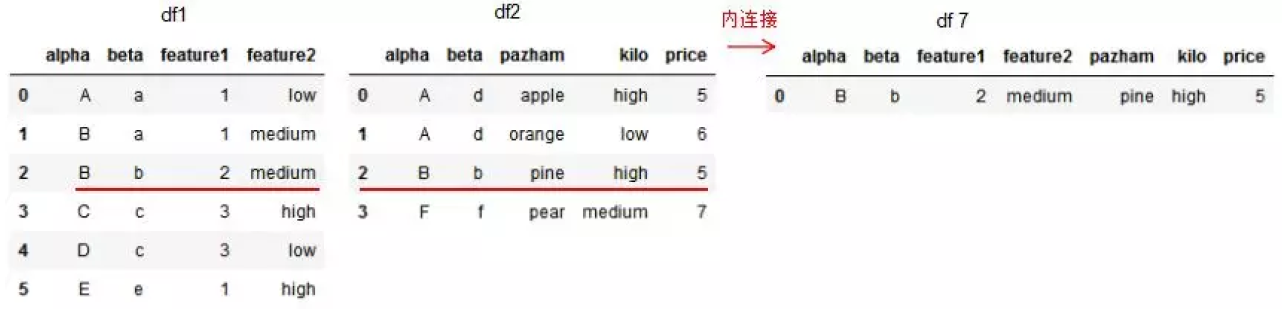

#### 基于多列的右连接

In [25]:
pd.merge(df1, df2, how='right', on=['alpha', 'beta'])

,alpha,beta,feature1,feature2,pazham,kilo,price
0,B,b,2.0,medium,pine,high,5
1,A,d,NaN,NaN,apple,high,5
2,A,d,NaN,NaN,orange,low,6
3,F,f,NaN,NaN,pare,medium,7


**基于多列右连接的含义**

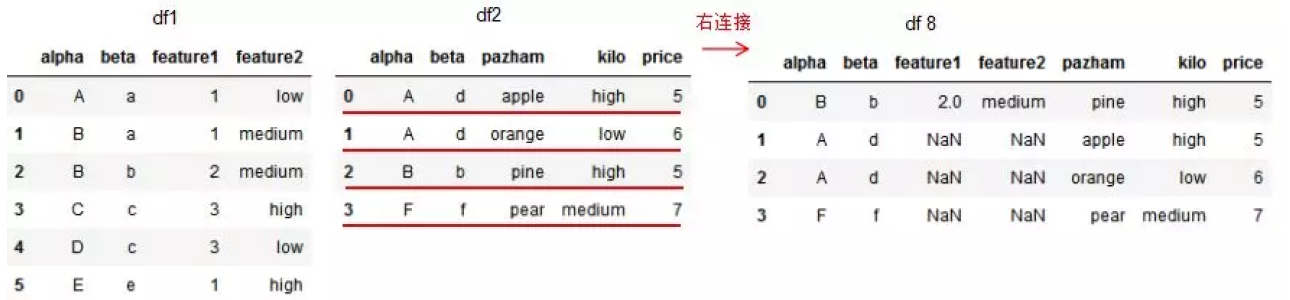

#### 基于index的连接方法

In [33]:
df1 = pd.DataFrame({'alpha':['A','B','B','C','D','E','F'],'beta':['a','a','b','c','c','e','e'],'feature1':[1,1,2,3,3,1,2],'feature2':['low','medium','medium','high','low','high', 'low']})
df2 = pd.DataFrame({'alpha':['A','A','B','F'],'beta':['d','d','f','b'],'pazham':['apple','orange', 'pine', 'pare'],'kilo':['high','low','high','medium'],'price':np.array([5,6,5,7])})


In [34]:
df1

,alpha,beta,feature1,feature2
0,A,a,1,low
1,B,a,1,medium
2,B,b,2,medium
3,C,c,3,high
4,D,c,3,low
5,E,e,1,high
6,F,e,2,low


In [35]:
df2

,alpha,beta,pazham,kilo,price
0,A,d,apple,high,5
1,A,d,orange,low,6
2,B,f,pine,high,5
3,F,b,pare,medium,7


In [36]:
df1.dtypes

alpha       object
beta        object
feature1     int64
feature2    object
dtype: object

In [37]:
df2.dtypes

alpha     object
beta      object
pazham    object
kilo      object
price      int32
dtype: object

In [38]:
pd.merge(df1, df2, how='inner', on='beta', right_index=True)

,alpha_x,beta,feature1,feature2,alpha_y,pazham,kilo,price
2,B,b,2,medium,F,pare,medium,7


In [39]:
pd.merge(df1, df2, how='inner', on='beta', right_index=True, suffixes=('_df1', '_df2'))

,alpha_df1,beta,feature1,feature2,alpha_df2,pazham,kilo,price
2,B,b,2,medium,F,pare,medium,7


In [40]:
pd.merge(df2, df1, how='inner', on='beta', right_index=True)

,alpha_x,beta,pazham,kilo,price,alpha_y,feature1,feature2
3,F,b,pare,medium,7,B,2,medium


### Join Method

- join方法是基于index连接dataframe

- merge方法是基于columns连接dataframe


In [41]:
caller = pd.DataFrame({'key':['K0', 'K1', 'K2', 'K3', 'K4', 'K5'], 'A':['A0', 'A1', 'A2', 'A3', 'A4','A5']})
other = pd.DataFrame({'key':['K0', 'K1', 'K2'], 'B':['B0', 'B1','B2']})

In [42]:
caller

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [43]:
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [44]:
caller.join(other, lsuffix='_caller', rsuffix='_other', how='inner')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2


In [45]:
caller.set_index('key').join(other.set_index('key'), how='inner')

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
